# Método de Euler

**Autor:** Felix Alberto Nieto García

**Ecuación diferencial**

Queremos aproximar la solución $\vec{y}(x_n)$ de la siguiente ecuación diferencial 
$ \dot{\vec{y}}= \vec{F}(x,\vec{y}(x))$ en un intervalo $x \in [x_0,x_f]$ y con condiciones iniciales $\vec{y}(x_0) = \vec{y}_0$.

**Aproximación**

La aproximación dada en terminos del algoritmo. 

$\vec{y}_{n+1} = \vec{y}_{n} + h_n\vec{f}(x_n,\vec{y_n})$

**Error**

El error se calcula de manera  local, es decir, para cada punto tenemos un error asociado. Se considera el valor absoluto de la diferencia entre la solución exacta $y(x)$ y la aproximación $y_n$ . 

$|e_n| = |y(x)-y_n|$

**Convergencia**

Dada una $h$ obtenemos una solución constituida por $N$ puntos. Para cada punto existe un error $|e_n|$ y por lo tanto  podemos conformar un conjunto de errores $\{ |e_n|\}_h$.  La convergecia se observa a través de tomar el supremo del error en el  invervalo $[x_0,x_f]$ de ese conjunto dependiente de $h$. El valor supremo acota a los demás para cada una de las $h$ y por lo tanto si hacemos tender $h$ a cero tiene que implicar que el error máximo disminuye a cero.

$$\lim_{h \to 0} \left( \underset{0<n<N}{sup} \{ |e_n|\}_h \right) =0$$

**Orden**

Como la solución converge $ \vec{y}_n\rightarrow \vec{y}(x_n)$ lo que implica  $||\vec{e}_n|| \rightarrow 0$ entonces 
$$ \vec{y}(x_{n+1})-\vec{y}_{n+1}  = \vec{e_n} + h \left[ \vec{F}(x_n,\vec{y}(x_n))-\vec{F}(t_n,\vec{y}_n) \right] + O(h^2) = O(h^2) $$

El método es de orden 2.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
''' 
Especificaciones

x0,y0 : Condiciones iniciales 
[x0,xf] : Intervalo de aproximación
h : Magnitud del paso
F : Función F(x,y) (Derivada de y)
S : Solución exacta y(x)
E : Error
maxE : Error máximo dada una h
X,Y : Conjunto de puntos de la aproximación 
'''

#Aproximación de euler para una h dada.
def euler(y0,x0,xf,h,F):
    X = np.arange(x0,xf,h)
    Y = np.zeros(len(X))
    Y[0] = y0
    for i in np.arange(1,len(X)):
        y0 = y0 + h*F(y0,X[i]) #Aproximación
        Y[i] = y0
    return X,Y

#El supremo del conjunto de errores dada una h.
def SupE(S,y0,x0,xf,h,F):
    maxE = np.zeros(len(h))
    for i in range(len(h)):
        X,Y = euler(y0,x0,xf,h[i],F)
        E = np.absolute(S(X)-Y)
        maxE[i] = np.max(E)
    return maxE

Ejemplo 1:

**Ecuación Diferencial** : $\dot{y}= y+5 e^{x/2}cos(5x)-\frac{1}{2}e^{x/2}sin(5x)$

**Condiciones iniciales**: $ y(0)=0$

**solución** : $y(x)= e^{x/2}sin(5x) $


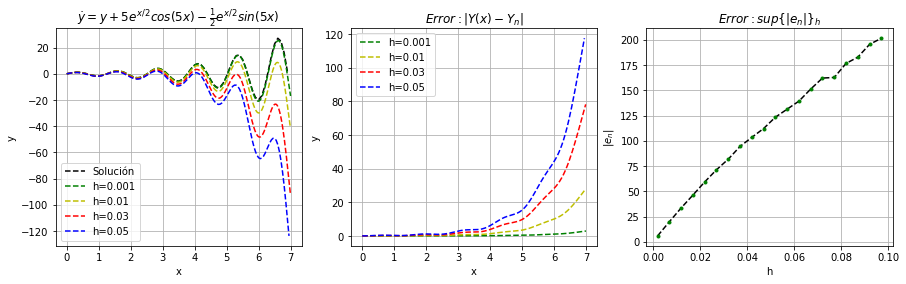

In [ ]:
#Funciones
F = lambda y,x: y + np.exp(x/2)*5*np.cos(5*x)-1/2*np.exp(x/2)*np.sin(5*x)
S = lambda x: np.exp(x/2)*np.sin(5*x)

#condiciones
y0 = 0
x0 = 0
xf = 7

#Graficos
plt.figure(figsize=(15, 4))
ax1 = plt.subplot(1,3,1) #Solución
ax2 = plt.subplot(1,3,2) #Error
ax3 = plt.subplot(1,3,3) #Supremos Error(h)

#Graficación de la solución exacta
Xs = np.arange(x0,xf,0.1)
ax1.plot(Xs,S(Xs),'--k',label="Solución")

#Grafiación de la aproximación para h's dadas.
color = ['g','y','r','b']
h = [0.001,0.01,0.03,0.05]

for i in range(len(h)) :
    X,Y = euler(y0,x0,xf,h[i],F)
    ax1.plot(X,Y,'--'+color[i],label="h="+str(h[i]))
    ax2.plot(X,np.absolute(S(X)-Y),'--'+color[i],label="h="+str(h[i]))

#Graficación los maxE en función de hs
hs = np.arange(0.002,0.1,0.005) #conjunto de h's 
maxE = SupE(S,y0,x0,xf,hs,F) 
ax3.plot(hs,maxE,'--k')
ax3.plot(hs,maxE,'.g')

#Propiedades de las graficas
ax1.set_title(r"$\dot{y}= y+5 e^{x/2}cos(5x)-\frac{1}{2}e^{x/2}sin(5x)$")
ax2.set_title("$Error : |Y(x)-Y_n|$")
for i in [ax1,ax2]:
    i.set_xlabel("x")
    i.set_ylabel("y")
    i.grid()
    i.legend()

ax3.set_title("$Error: sup\{|e_n| \}_h$")
ax3.set_xlabel("h")
ax3.set_ylabel("$|e_n|$")
ax3.grid()


Podemos concluir dos cosas:
1. Podemos apreciar que el error seguira aumentando conforme las iteraciones continuan.
2. Conforme hacemos $h$ tienda a cero, el error cada vez es menor.
3. El método converge.

Podemos definir otro error en un punto. Tomamos un 'x' fija $x=x_a$ y depués tomamos la diferencie entre el valor de la solución exacta en ese punto contra la aproximación para cada una de las $h$'s:

$$f(h)= |y(x_a)-y_{nx_a}|= |y(x_a)- y_{(n-1)x_a} + hf(x_a,y_{(n-1)x_a)}| $$

In [ ]:
''' 
Especificaciones

x0,y0 : Condiciones iniciales 
[x0,xf] : Intervalo de aproximación
h : Magnitud del paso
F : Función F(x,y) (Derivada de y)
S : Solución exacta y(x)
X,Y : Conjunto de puntos de la aproximación 
'''
def Errpunto(xa,y0,x0,xf,h,F,S):
    P = []
    for i in h :
        X,Y = euler(y0,x0,xf,i,F)
        Y1= np.absolute(S(X)-Y)
        P.append(np.absolute(Y1[np.where(X==xa)[0][0]]))
    return np.array(P)

Text(0.5, 1.0, 'Error en x=4 en función de h  ')

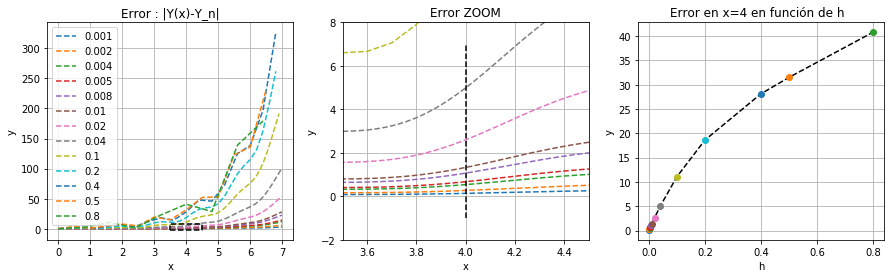

In [ ]:
#Error en
xa = 4

#Graficos
plt.figure(figsize=(15, 4))
ax1 = plt.subplot(1,3,1) #Solución
ax2 = plt.subplot(1,3,2) #Error 
ax3 = plt.subplot(1,3,3) #Error en xa

h = [0.001,0.002,0.004,0.005,0.008,0.01,0.02,0.04,0.1,0.2,0.4,0.5,0.8] #h's de prueba

#Grafica de el error en un punto en función de h
Ep =Errpunto(xa,y0,x0,xf,h,F,S)
ax3.plot(h,Ep,'--k') #Grafica de linea punteada 

#Grafica de las aproximaciones 
for i in range(len(h)) :
    X,Y = euler(y0,x0,xf,h[i],F)
    ax1.plot(X,np.absolute(S(X)-Y),'--', label= h[i])
    ax2.plot(X,np.absolute(S(X)-Y),'--')
    ax3.plot(h[i],Ep[i],'o')#Grafica de puntos

#Rectángulo de zoom
ax1.plot([3.5,4.5,4.5,3.5,3.5],[-2,-2,8,8,-2],'--k')
ax2.plot([xa,xa],[-1,7],'--k')
ax2.set_xlim([xa-0.5,xa+0.5])
ax2.set_ylim([-2,8])

#Propiedades de las graficas
for i in [ax1,ax2]:
    i.grid()
    i.set_xlabel("x")
    i.set_ylabel("y")
    
ax1.legend()
ax3.set_xlabel("h")
ax3.set_ylabel("y")
ax3.grid()

ax1.set_title(f"Error : |Y(x)-Y_n|")
ax2.set_title("Error ZOOM")
ax3.set_title(f"Error en x={xa} en función de h  ")

Al tomar un valor $x_a$ fijo y graficar el error en ese punto en función de h^2 se puede observa en la grafica 3. Cuando se toma la definición de supremo garantiza que todos los errores menores tiendan a cero si el supremo lo hace, pero no nos garantiza que el supermo se encuentre para la misma $x_a$.